# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.  edited for Python 3 

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
    # print(data.head())
    
    
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [3]:
from scipy.stats import norm
def gaussian_func(x, *p):
    A, mu, sigma = p
    return A * np.exp(-(x-mu)**2 / (2.*sigma**2))
# fit gaussian features
gaussian_fits = []
for column in data:
    feature = data[column]
    mu, sigma = norm.fit(feature)
    feature_fit = gaussian_func(feature, 1, mu, sigma)
    error = np.linalg.norm(feature - feature_fit)
    gaussian_fits.append([mu, sigma, error / (len(feature) * feature.std())])
    
print("\n Gaussian fitting of features")
gaussian_fits = pd.DataFrame(np.array(gaussian_fits).T,
                            columns = data.columns,
                            index = ['median', 'var', 'error/(N * std)'])
display(gaussian_fits)


 Gaussian fitting of features


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
median,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
var,12632.948725,7371.985612,9492.357638,4849.153520,4762.433350,2816.899449
error/(N * std),0.065677,0.060573,0.062116,0.056367,0.055654,0.054143


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [5,10,75]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9413,8259,5126,666,1795,1451
1,3366,5403,12974,4400,5977,1744
2,20398,1137,3,4407,3,975


In [5]:
indices = [5,10,75]
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
mean_data = np.mean(data)
std_data = np.std(data)
deviation_samples = (samples - mean_data) / std_data
print("\nDeviation of wholesale customers from samples:")
display(deviation_samples)


Deviation of wholesale customers from samples:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-0.204806,0.334067,-0.297637,-0.496155,-0.228138,-0.026224
1,-0.683474,-0.053346,0.529133,0.273876,0.649984,0.077791
2,0.664746,-0.632023,-0.837334,0.275320,-0.604416,-0.195204


Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9413,8259,5126,666,1795,1451
1,3366,5403,12974,4400,5977,1744
2,20398,1137,3,4407,3,975


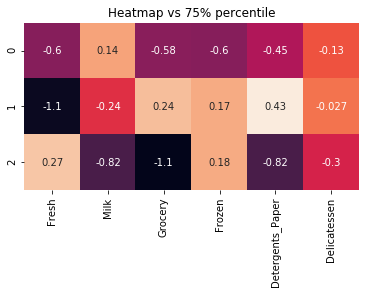

In [6]:
import seaborn as sns
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [5,10,75]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)
plt.axes().set_title("Heatmap vs 75% percentile")
sns.heatmap((samples-data.quantile(q=0.75))/data.std(ddof=0), annot=True, cbar=False, square=True)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

Index 5 - seem to be a Cafe since there are lots of grocery but not that many frozen this location also uses about the same of paper and delicatessen,  So that is why I feel this is a Cafe where they serve sandwiches.

Index 10 - seems to be a retailer since most of the catagories seem to be around the same amount.

Index 75 - seems to be a restaurant since this location seems to use alot of fresh food little grocery so it seems that this is a locations that serves lots of food. 



### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [7]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor


# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature

# new_data = data.drop(['Detergents_Paper'], axis=1, inplace=False)
new_data = data.copy()
names = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

scores = []

for name in names:
    label = new_data[name]
    features = new_data.drop([name], axis=1)

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.25, random_state=1)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=0)
    regressor.fit(X_train, y_train)
                                                
    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    scores.append(score)
    # print("Score: ", score)
    
result = pd.DataFrame(np.array([names, scores]).T, columns=['Feature', 'Score'])
display(result)
    
# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Detergents_Paper'], axis=1, inplace = False)
print("Detergents_Paper")
# Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Detergents_Paper'], \
                                                    test_size=0.25, random_state=0)

# Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

# Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)
print("Score:",score)


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,Feature,Score
0,Fresh,-1.13897180207
1,Milk,0.372557452052
2,Grocery,0.795293171715
3,Frozen,-0.696550018302
4,Detergents_Paper,0.763468783139
5,Delicatessen,-10.5864940608


Detergents_Paper
Score: 0.728655181254


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** 

The fresh, frozen, and delicatessen failed to fit the data.  The milk predicted score was very close to the 0.  Since milk was 0.37 so it was alot closer to 0.  The grocery and detergents_paper was fit better since it was 0.76 for the paper and 0.79 for the grocery so both were closer to 1.  So they were well fit.

I then focused my prediction on one R^2 score of 72.87% for the Detergents_Paper feature.  Comparring all the features it seems that another feature is more critical when looking at the R^2 scores.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

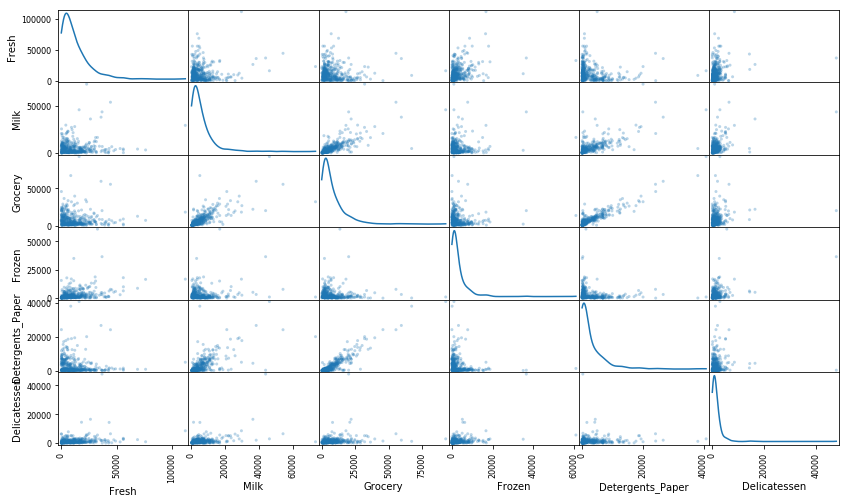

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tools.plotting import scatter_matrix
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

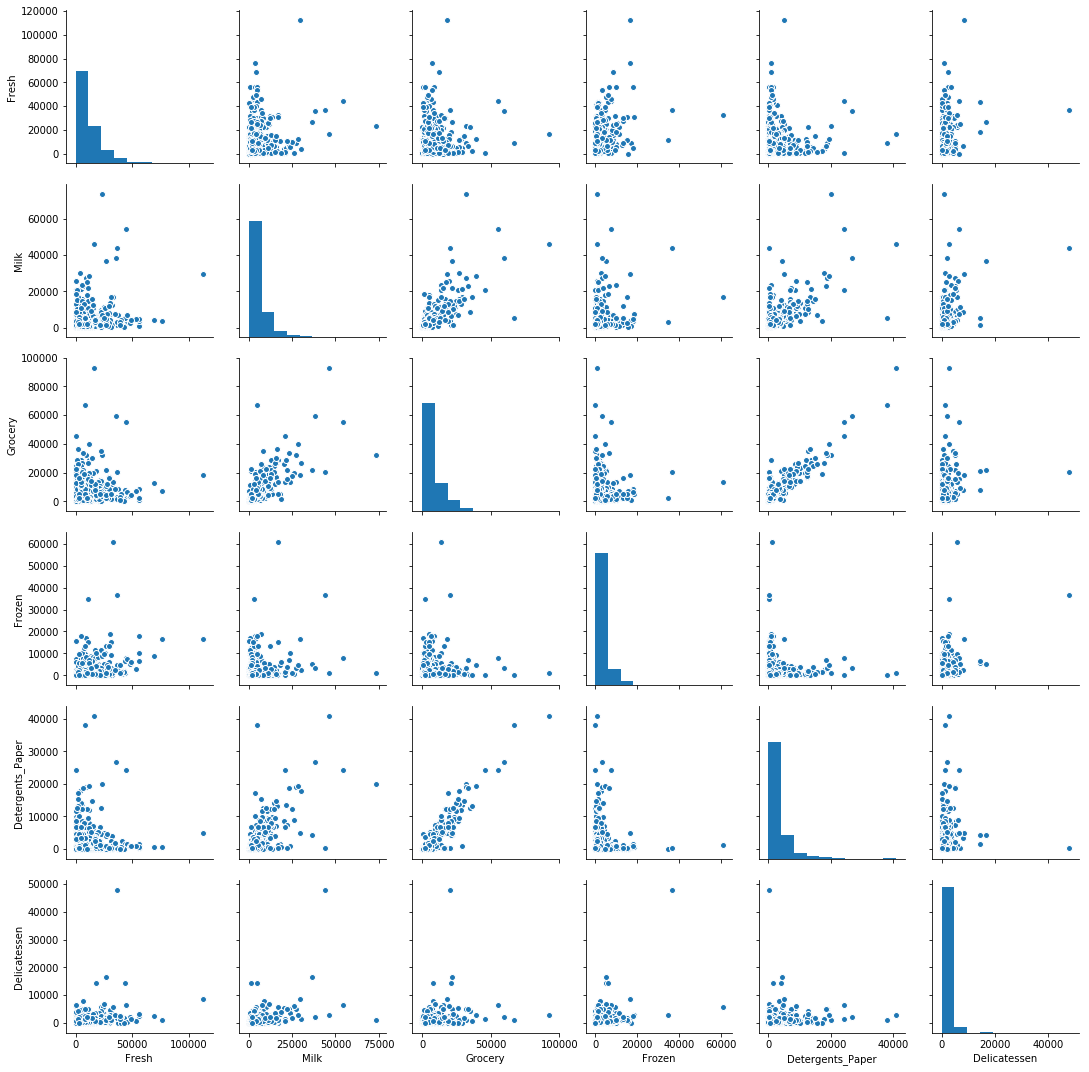

In [9]:
sns.pairplot(data);

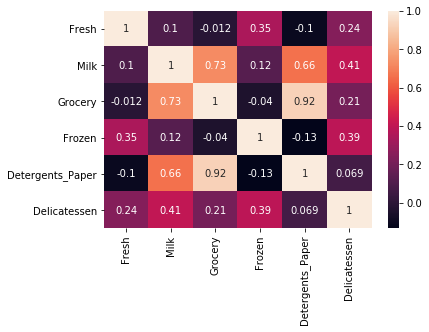

In [10]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True)

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

There seems to be a high linear correlation between Detergents Paper and Grocery with a 0.92.  The next highest correlation would be Grocery and Milk with a score of 0.73. There also seems to be very low correlation between Grocery and Frozen with a score of 0.04. These scores were shown in the heat map.  Based on the data it seems that the customers are mostly smaller stores.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

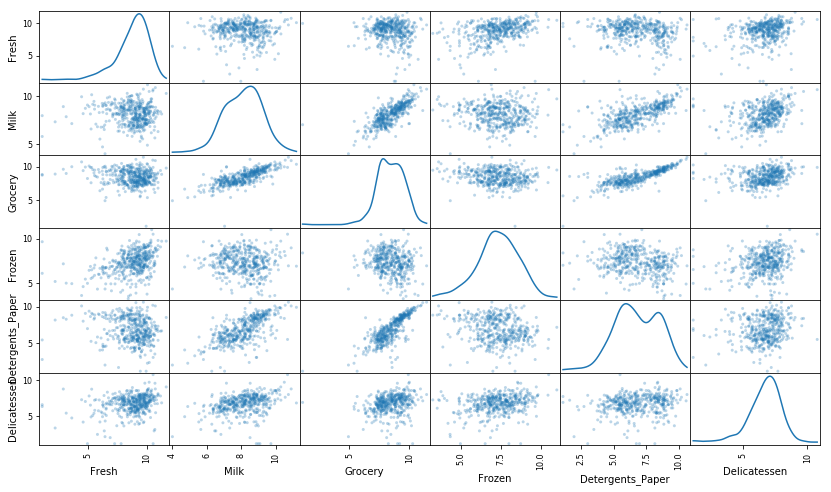

In [11]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [12]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.149847,9.019059,8.542081,6.501290,7.492760,7.280008
1,8.121480,8.594710,9.470703,8.389360,8.695674,7.463937
2,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [13]:
outliers = []
bad_indexes = {}

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    feature_data = log_data[feature]
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25.)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75.)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    print("Outlier step:", step)
    
    feature_outliers = log_data[~((feature_data >= Q1 - step) &  (feature_data <= + step))]
    for i, r in feature_data.iteritems():
        if not (Q1 - step <= r <= Q3 + step):
            if i not in bad_indexes:
                bad_indexes[i] = 1
            else:
                bad_indexes[i] += 1
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(feature_outliers)
    
    #feature_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]

# OPTIONAL: Select the indices for data points you wish to remove
outliers  += feature_outliers.index.tolist()
outliers = [i for i, n in bad_indexes.items() if n > 1]
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print("Number of outliers (including duplicates): ", len(outliers))
print("Dataset with outliers removed has {} samples with {} features.".format(*good_data.shape))
print(sorted(outliers))

Outlier step: 2.53350786861
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
5,9.149847,9.019059,8.542081,6.501290,7.492760,7.280008
6,9.403107,8.070594,8.850088,6.173786,8.051978,6.300786
7,8.933137,8.508354,9.151227,7.419980,8.108021,7.850104
8,8.693329,8.201934,8.731013,6.052089,7.447751,6.620073
9,8.700514,9.314070,9.845911,7.055313,8.912608,7.648740


Outlier step: 2.31824827282
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
5,9.149847,9.019059,8.542081,6.501290,7.492760,7.280008
6,9.403107,8.070594,8.850088,6.173786,8.051978,6.300786
7,8.933137,8.508354,9.151227,7.419980,8.108021,7.850104
8,8.693329,8.201934,8.731013,6.052089,7.447751,6.620073
9,8.700514,9.314070,9.845911,7.055313,8.912608,7.648740


Outlier step: 2.3988562138
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
5,9.149847,9.019059,8.542081,6.501290,7.492760,7.280008
6,9.403107,8.070594,8.850088,6.173786,8.051978,6.300786
7,8.933137,8.508354,9.151227,7.419980,8.108021,7.850104
8,8.693329,8.201934,8.731013,6.052089,7.447751,6.620073
9,8.700514,9.314070,9.845911,7.055313,8.912608,7.648740


Outlier step: 2.34932750101
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
5,9.149847,9.019059,8.542081,6.501290,7.492760,7.280008
6,9.403107,8.070594,8.850088,6.173786,8.051978,6.300786
7,8.933137,8.508354,9.151227,7.419980,8.108021,7.850104
8,8.693329,8.201934,8.731013,6.052089,7.447751,6.620073
9,8.700514,9.314070,9.845911,7.055313,8.912608,7.648740


Outlier step: 4.08935876094
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
5,9.149847,9.019059,8.542081,6.501290,7.492760,7.280008
6,9.403107,8.070594,8.850088,6.173786,8.051978,6.300786
7,8.933137,8.508354,9.151227,7.419980,8.108021,7.850104
8,8.693329,8.201934,8.731013,6.052089,7.447751,6.620073
9,8.700514,9.314070,9.845911,7.055313,8.912608,7.648740


Outlier step: 2.24228065442
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
5,9.149847,9.019059,8.542081,6.501290,7.492760,7.280008
6,9.403107,8.070594,8.850088,6.173786,8.051978,6.300786
7,8.933137,8.508354,9.151227,7.419980,8.108021,7.850104
8,8.693329,8.201934,8.731013,6.052089,7.447751,6.620073
9,8.700514,9.314070,9.845911,7.055313,8.912608,7.648740


Number of outliers (including duplicates):  5
Dataset with outliers removed has 435 samples with 6 features.
[65, 66, 75, 128, 154]


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

The data points that are outliers are points 65, 66, 75, 128 and 154.  The data point that I would consider removing would be 65, 66,142,and 154 since these data points have more than one outlier feature.  65 is an outlier of Fresh and Frozen.  66 is a outlier of Fresh and Delicatesen.  75 is a oulier of Grocery and Detergents_Paper.  128 is a outlier of Fresh and Delicatessen.  154 is an outlier of Milk, Delicatessen, and Grocery.  These outliers are below the Inter Quartial Range.  My recomendation would be to remove these outliers since they could skew the results.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


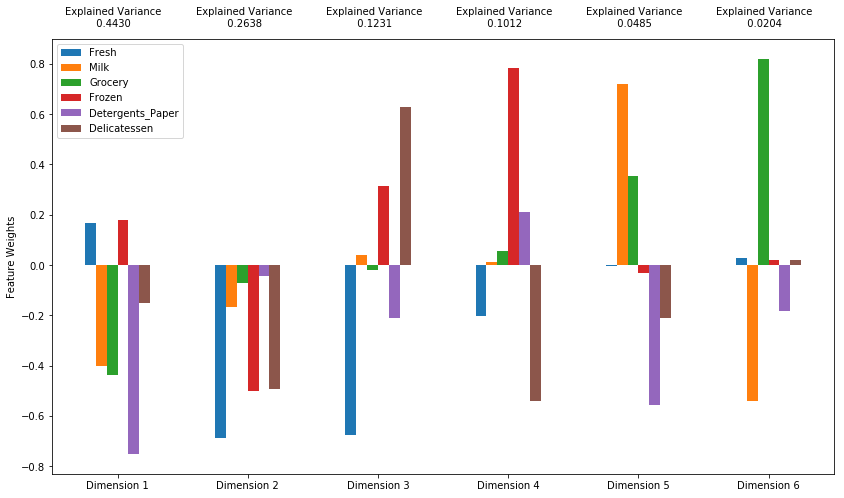

In [14]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)
print(pca_results['Explained Variance'].cumsum())

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**  The expected variance of the combination of features is 0.4430 which is 44.30%  (1st feature) + 0.2638 which is 26.38% (2nd feature) would be = 70.86% and if we add 0.1231 which is 12.31% (3rd feature) and 0.1012 which is 10.12% (4th feature) we get a total of all four features of 93.11% 

First couple components:
PC: 44.30% +  PC: 26.38%  = Total: 70.68% 
Next couple components:
PC: 12.31% +  PC: 10.12%  = Total: 22.43%
Combined 4 components:
Total 1: 70.68% + Total 2: 22.43% = Total of Four Features 93.11%

PC1: Mostly Detergent_Paper but it also includes gains on Milk, Delicatassen, and Grocercy.  Although it predicts badly for Frozen and Fresh.  Based on this information i feel this could be a supermarket.

PC2: Has gains in Frozen and Fresh and works well with the Delicatessen.  While looking at the information predicted the gains on Grocery and Milk with only a little loss on the Detergents_Paper.  So I would say this is probably a restaurant or possibility a hospitality business.

PC3: Has gains on Detergents_Paper and Fresh.  The loss is on the other features.  So this is probability a corner shop that has some groceries and convience items.

PC4: Has a greater gain on Detergents_Paper and Frozen.  There is a loss on the other features so that means that this one is focused on frozen goods so probablity a warehouse for frozen food.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [15]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.0850,-0.3243,-0.2635,-0.8812,0.1862,-0.5347
1,-2.0887,-0.7006,0.8537,1.0105,-0.5587,0.2495
2,8.3026,-0.4747,0.9774,-1.1195,-0.2977,-4.3514


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4430,0.1675,-0.4014,-0.4381,0.1782,-0.7514,-0.1499
Dimension 2,0.2638,-0.6859,-0.1672,-0.0707,-0.5005,-0.0424,-0.4941


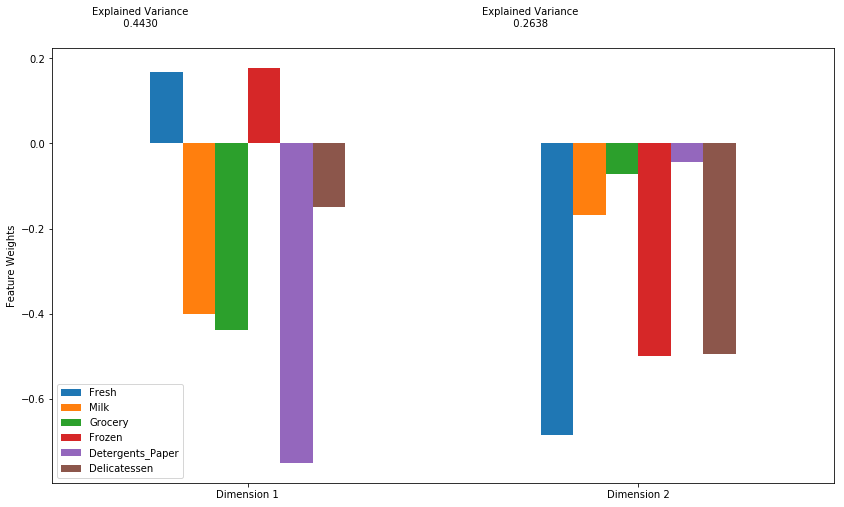

In [16]:

# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
vs.pca_results(good_data, pca)

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [17]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.0850,-0.3243
1,-2.0887,-0.7006
2,8.3026,-0.4747


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C916631898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001C916558CC0>]], dtype=object)

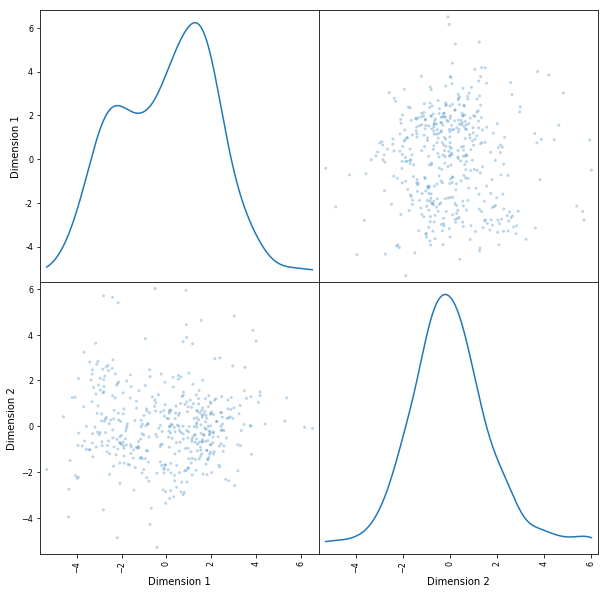

In [18]:
pd.plotting.scatter_matrix(reduced_data, alpha = 0.3, figsize = (10,10), diagonal = 'kde')

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

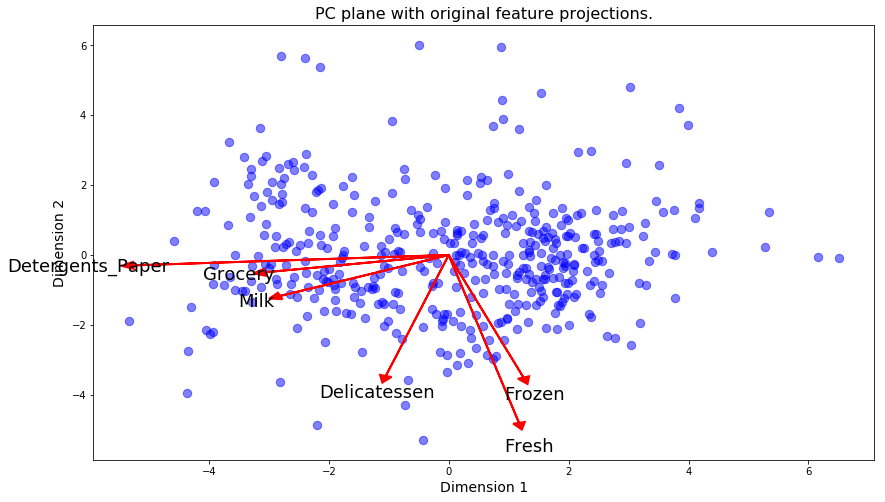

In [19]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
-Advantages of K-Means clustering is fast running but it also uses fewer parameters.  Since it always converges
it is easy to use so it is great for searching clusters.  The main advantage is that K-Means points are ridgidlty able place a point in one of the cluster.

-Advantages of Gaussian Mixture clustering

Fastest for learning algorithm
does handle overlapping clusters

-Gaussian Mixture gives you more control since there are a lot more parameters to work with such as Z mu, sigma, and pi.  
The data seems to be not giving any clear directions so I am going to use Gaussian Mixture Model since it can predict events through probability. 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [20]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

def score_cluster(data, num_components):
    
    global clusterer, preds, centers, preds
    
    clusterer = GaussianMixture(n_components=num_components, random_state=13)
    clusterer.fit(data)
    centers = clusterer.means_
    preds = clusterer.predict(data)
    score = silhouette_score(data, preds)
    return score

print("Silhouette Score (different sizes)")
silhouette_scores_matrix = pd.DataFrame(index=['Score'])

for size in range(2,16):
    silhouette_scores_matrix[size] = pd.Series(score_cluster(reduced_data, size), index = silhouette_scores_matrix.index)
    
display(silhouette_scores_matrix)

best_n_components = 2

best_n_components = 2

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(n_components=best_n_components, random_state=0)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print("Best Score: {}, n_components={}".format(score, best_n_components))

#results = pd.DataFrame(columns=['Silhouette Score'])
#results.columns.name = 'Number of Clusters'
#for k in range(2,16):
#    score = produceGMM(k)
#    results = results.append((pd.DataFrame([score], columns=['silhouette Score'], index=[k])))
    
#    display(results)



Silhouette Score (different sizes)


,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Score,0.422325,0.404249,0.346572,0.274281,0.345686,0.32835,0.300976,0.267009,0.303279,0.313615,0.303143,0.323173,0.26669,0.270024


Best Score: 0.4219168464626149, n_components=2


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**  Reference Creating Clusters from above. 
The best value of the silhouette score determined by experimenting in the code is a cluster of 2 , that seems to return the best results. This is was determined by using a loop where the values of clusters changed from 2 to 16 incrementing by one each time. To experiment with the posibilities to find the best amount of clusters by the silhouette score. 

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

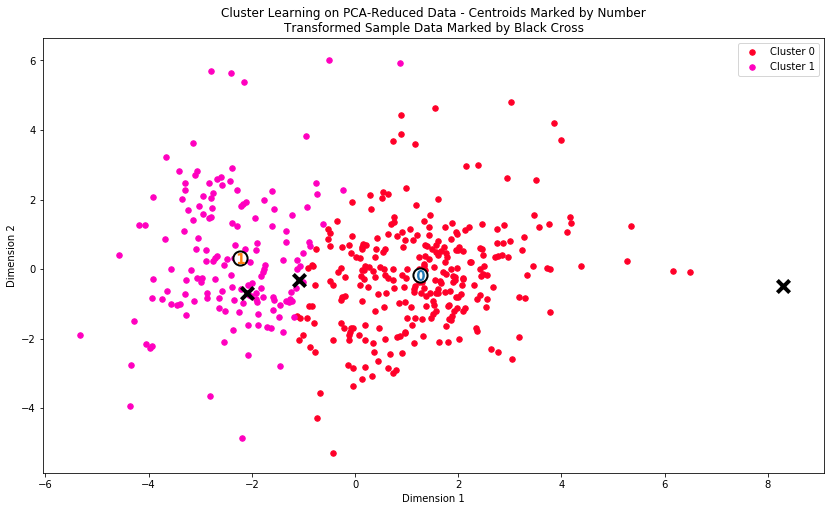

In [21]:
# Optimal cluster from question above
silhouette_scores_matrix[2]
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [22]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8953.0,2114.0,2765.0,2075.0,353.0,732.0
Segment 1,3552.0,7837.0,12219.0,870.0,4696.0,962.0


In [23]:
# Stats data
newdata = data.append(true_centers)
print("Centers")
percent_centers = 100.0 * newdata.rank(axis=0, pct=True).loc[['Segment 0', 'Segment 1']].round(decimals=3)
display(percent_centers)

Centers


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,52.5,34.4,34.4,58.4,32.2,41.4
Segment 1,28.1,78.7,80.3,31.0,80.3,50.0


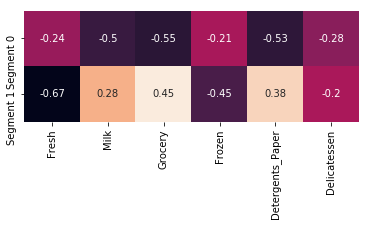

In [24]:
sns.heatmap((true_centers-data.mean())/data.std(ddof=0), square=True, annot=True, cbar=False)

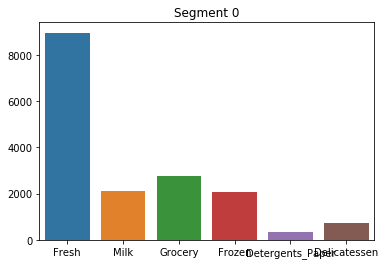

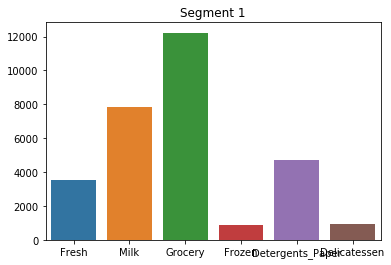

In [25]:
plt.figure()
plt.axes().set_title("Segment 0")
sns.barplot(x=true_centers.columns.values, y=true_centers.iloc[0].values)

plt.figure()
plt.axes().set_title("Segment 1")
sns.barplot(x=true_centers.columns.values, y=true_centers.iloc[1].values)

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:** 
Segment 0 uses alot of Fresh since their is a higher weight to that feature and Frozen is next on the higher weighed catagorey so I would think based on this data that segment 0 would be a place that uses alot of fresh and frozen foods so probably a restraunt.

Segment 1 uses alot of Milk and Grocery to the point that it over exceeds the observed data.  Based on this data and the features with this weight I would think this is a warehouse or supermarket.

As you can see from the data in the chart above, segment 0 used over 50% of Fresh and Frozen and segment 1 used almost 70% of their supplies in Milk, Grocery, and Detergents_paper.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [26]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**  When running the code I see that sample point 0 and sample point 1 are in the same cluster so that would mean they are the same type of business. Then the other sample was in a different class of business or so it seems from the prediction. 

0) Index 5
   My assessment based on the data: Cafe 
   Model assessment: Supermarket/Bulk Distributor
   So my prediction based on the data and the model assessment match sort of.  
   I was thinking smaller the model saw it on a bigger scale.
1) Index 10
   My assessment based on the data: Retailer
   Model assessment: Supermarket/Bulk Distributor
   So my prediction was close since I said it was a retailer and the model assessment says its a supermarket a type of retailer.
2) Index 75
   My assessment based on the data: Restaurant
   Model assessment: Restaurant
   For this last one I seemed to be in sync with my prediction and the model assessment. 

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
The customers that buy Fresh, Frozen and Milk will want to have those products delivered more often since they have a shorter shelf life than the other products being delivered.  So if the wholesale distributer focuses on those products they will have a better understanding if those customers would be a client that would prefer the 5 days a week delivery system. The other clients may be more confortable with the change in the delivery schedule. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

This could use a differnt cluster of data points to train this model to be able to target the new customers better. 
Another idea would be after running an unsupervied clustering to the use the new data on a supervied learning model that has been tuned using another technique like boosting. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

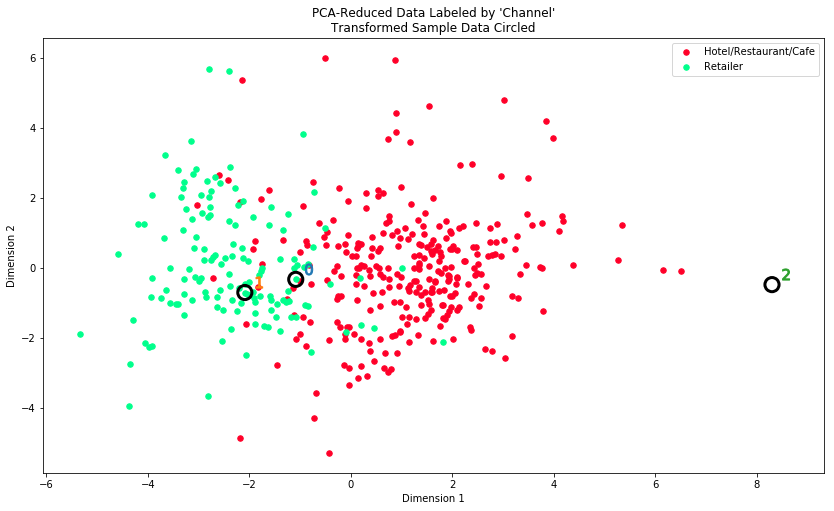

In [27]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
After looking at the data plotted above, I would have to say there seems to be some overlap for instance on point 0.  Where that point might have been a Cafe since is fell in both the retailer and the cafe according to the plot above. I would say that there would need to be more clusters tuned in-order to show more diversity of what the different customers are. I feel that there needs to be some more training and tuning to better classify these data points by doing this we can get a better understanding of the features that are important to each customer and in turn be able to serve them better.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.